In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('DOGE-INR.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-10,0.231275,0.235491,0.207091,0.212925,0.212925,1.394509e+10
1,2020-02-11,0.214716,0.219927,0.204174,0.216759,0.216759,1.210047e+10
2,2020-02-12,0.216755,0.226226,0.214854,0.220534,0.220534,1.293542e+10
3,2020-02-13,0.218450,0.229230,0.211920,0.215681,0.215681,1.201356e+10
4,2020-02-14,0.213780,0.225094,0.213234,0.223868,0.223868,1.007451e+10
...,...,...,...,...,...,...,...
362,2021-02-06,3.416031,4.244130,3.268455,4.192222,4.192222,4.328066e+11
363,2021-02-07,4.185444,6.140783,3.947986,5.734924,5.734924,1.038132e+12
364,2021-02-08,5.703670,6.189522,4.716577,5.748727,5.748727,9.367422e+11
365,2021-02-09,5.744898,6.056642,4.781989,5.104978,5.104978,5.354060e+11


In [4]:
df.shape

(367, 7)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df=df.dropna()

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-10,0.231275,0.235491,0.207091,0.212925,0.212925,1.394509e+10
1,2020-02-11,0.214716,0.219927,0.204174,0.216759,0.216759,1.210047e+10
2,2020-02-12,0.216755,0.226226,0.214854,0.220534,0.220534,1.293542e+10
3,2020-02-13,0.218450,0.229230,0.211920,0.215681,0.215681,1.201356e+10
4,2020-02-14,0.213780,0.225094,0.213234,0.223868,0.223868,1.007451e+10
...,...,...,...,...,...,...,...
362,2021-02-06,3.416031,4.244130,3.268455,4.192222,4.192222,4.328066e+11
363,2021-02-07,4.185444,6.140783,3.947986,5.734924,5.734924,1.038132e+12
364,2021-02-08,5.703670,6.189522,4.716577,5.748727,5.748727,9.367422e+11
365,2021-02-09,5.744898,6.056642,4.781989,5.104978,5.104978,5.354060e+11


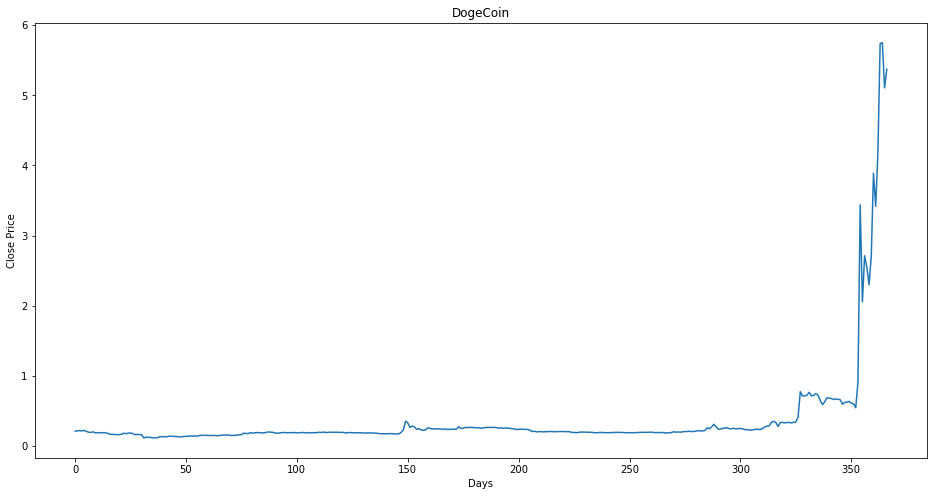

In [8]:
# Visualize the plot
plt.figure(figsize=(16,8))
plt.title('DogeCoin')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

In [9]:
df=df[['Close']]
df.head(5)

,Close
0,0.212925
1,0.216759
2,0.220534
3,0.215681
4,0.223868


In [10]:
# Create a new variable 'x' that predicts x days into the future
future_days=30
# Create a target column shifted to 'x' days up
df['Prediction']=df[['Close']].shift(-future_days)
df

<ipython-input-10-bd1ab7ff0aaf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction']=df[['Close']].shift(-future_days)


,Close,Prediction
0,0.212925,0.161970
1,0.216759,0.114424
2,0.220534,0.128528
3,0.215681,0.123197
4,0.223868,0.124584
...,...,...
362,4.192222,NaN
363,5.734924,NaN
364,5.748727,NaN
365,5.104978,NaN


In [11]:
# Create a feature dataset (X) and convert it to numpy array and remove the last 'x' days from the dataset
X=np.array(df.drop(['Prediction'],axis=1))[:-future_days]
X.shape

(333, 1)

In [12]:
# Create a target dataset of datatype array and remove the last 'x' units/days 
y=np.array(df['Prediction'])[:-future_days]

In [13]:
y.shape

(333,)

In [14]:
# Split the dataset into train and test with 75%
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.25)

In [15]:
# Preparing the models using linear regression and Decision Tree Regression
#Fitting the model into linear regression
ln=LinearRegression().fit(X_train,y_train)

#Fitting the model into Decision Tree Regression
dr=DecisionTreeRegressor().fit(X_train,y_train)

In [16]:
# Get the last 'x' rows of the feature dataset
x_future=np.array(df.drop(['Prediction'],axis=1))[:-future_days]
x_future=df.tail(future_days)
x_future=np.array(x_future)
x_future = x_future[~np.isnan(x_future)]
x_future=x_future.reshape(-1,1)


In [17]:
# Predict the model
tree_prediction = dr.predict(x_future)
print(tree_prediction)
print()

lr_prediction = ln.predict(x_future)
print(lr_prediction)


[5.369837 5.369837 2.704501 2.704501 5.369837 5.369837 5.369837 5.369837
 5.369837 5.369837 5.369837 5.369837 5.369837 5.369837 5.369837 5.369837
 2.550038 2.550038 2.550038 2.550038 2.550038 2.550038 2.550038 2.550038
 2.550038 2.550038 2.550038 2.550038 2.550038 2.550038]

[ 2.99338846  3.28048718  3.67810021  3.66850438  3.61259457  3.51136563
  3.5681433   3.53067724  3.49289366  3.03576533  3.22228424  3.25093767
  3.32692816  3.14817764  3.07915823  2.68769782  5.29355087 23.09277545
 13.32617653 17.96729068 16.82456863 15.04905814 17.9144219  26.27473099
 22.93669506 28.41141859 39.29634781 39.39373842 34.85160241 36.72038294]


<ipython-input-18-d34efb385b49>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=predictions


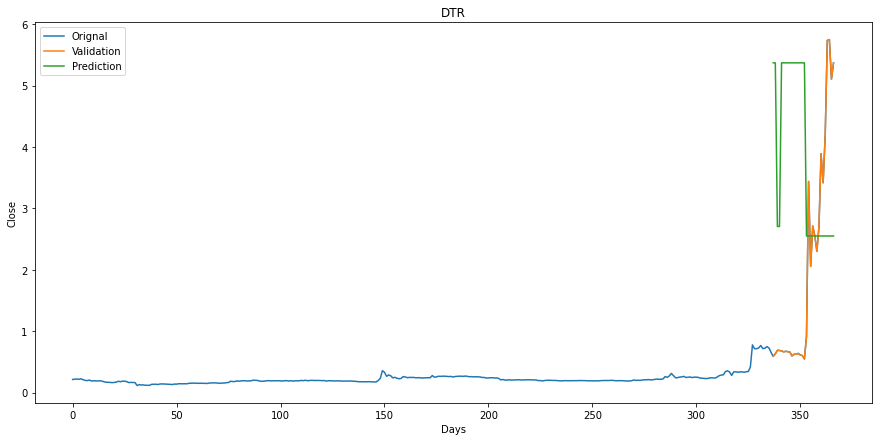

In [18]:
# Visualize the data
predictions= tree_prediction

valid=df[X.shape[0]:]
valid['Prediction']=predictions
plt.figure(figsize=(15,7))
plt.title('DTR')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orignal', 'Validation', 'Prediction'])
plt.show()

<ipython-input-19-5f999a79e8f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=predictions


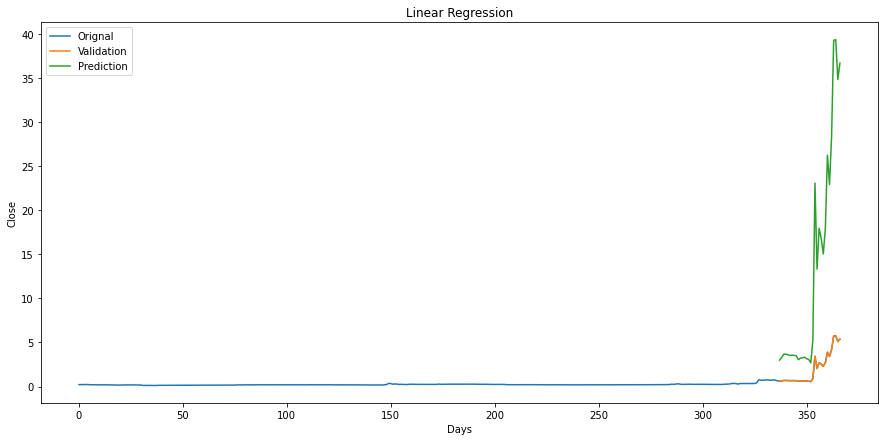

In [19]:
predictions= lr_prediction

valid=df[X.shape[0]:]
valid['Prediction']=predictions
plt.figure(figsize=(15,7))
plt.title('Linear Regression')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orignal', 'Validation', 'Prediction'])
plt.show()